In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#LSTM
model.add(LSTM(units = 30, input_shape = (16, 13*13), return_sequences = False))
#FC
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 reshape_3 (Reshape)         (None, 16, 169)           0         
                                                                 
 lstm_3 (LSTM)               (None, 16, 30)            24000     
                                                                 
 flatten_2 (Flatten)         (None, 480)               0         
                                                      

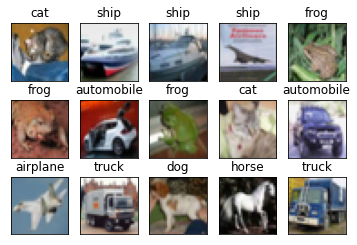

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#LSTM
model.add(LSTM(units = 30, input_shape = (16, 13*13), return_sequences = True, dropout = 0.5))
#Flatten
model.add(Flatten())
#FC
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 reshape_4 (Reshape)         (None, 16, 169)           0         
                                                                 
 gru (GRU)                   (None, 16, 30)            18090     
                                                                 
 flatten_3 (Flatten)         (None, 480)               0         
                                                      

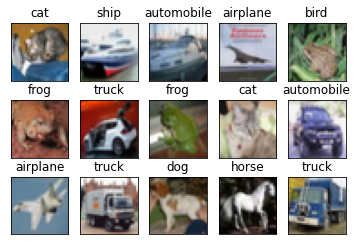

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D, GRU
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#GRU
model.add(GRU(units = 30, input_shape = (16, 13*13), return_sequences = True, dropout = 0.5))
#Flatten
model.add(Flatten())
#FC
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 reshape_7 (Reshape)         (None, 16, 169)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 16, 60)           48000     
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 960)              

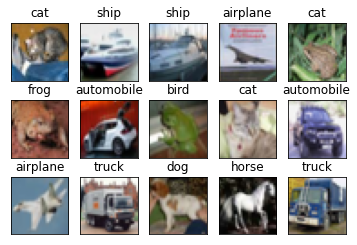

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D, Bidirectional
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#LSTM
model.add(Bidirectional(LSTM(units = 30, return_sequences = True, dropout = 0.5), input_shape = (16, 13*13)))
#Flatten
model.add(Flatten())
#FC
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 reshape_8 (Reshape)         (None, 16, 169)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 16, 60)           36180     
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 960)              

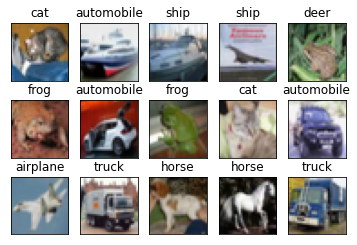

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D, Bidirectional
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#LSTM
model.add(Bidirectional(GRU(units = 30, return_sequences = True, dropout = 0.5), input_shape = (16, 13*13)))
#Flatten
model.add(Flatten())
#FC
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import SimpleRNN, Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D, Bidirectional
from keras.optimizers import Adam

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#model
model = Sequential()
#conv2d
model.add(Conv2D(
        32,
        (3, 3),
        activation = 'relu',
        strides = (1, 1),
        input_shape = (32, 32, 3)
        ))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(
    16,
    (3, 3),
    activation = 'relu'
))
#reshape
model.add(Reshape(target_shape = (16, 13*13)))
#LSTM
model.add(Bidirectional(LSTM(units = 30, return_sequences = True, dropout = 0.5), input_shape = (16, 13*13)))
model.add(Bidirectional(LSTM(units = 30, return_sequences = True, dropout = 0.5)))
model.add(Bidirectional(LSTM(units = 30, return_sequences = True, dropout = 0.5)))
#Flatten
model.add(Flatten())
#FC
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 reshape_9 (Reshape)         (None, 16, 169)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 16, 60)           48000     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 16, 60)          